# Loading relevant libraries and the dataset

In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="white", color_codes=True)

import warnings
warnings.filterwarnings("ignore")

In [22]:
colNames = ('Id', 'refractive_index', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon', 'Potassium', 'Calcium', 
            'Barium', 'Iron', 'Type')
glass = pd.read_csv('glass.csv', delimiter = ',', header = None, names = colNames)

# Summary of the dataset (descriptive and visualizations)

In [11]:
glass.dtypes

Id                    int64
refractive_index    float64
Sodium              float64
Magnesium           float64
Aluminum            float64
Silicon             float64
Potassium           float64
Calcium             float64
Barium              float64
Iron                float64
Type                  int64
dtype: object

In [12]:
glass.shape

(214, 11)

In [13]:
glass.head()

,Id,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [14]:
glass.tail()

,Id,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [16]:
glass.Iron.max()

0.51

In [25]:
glass.set_index('Id', inplace=True)

In [27]:
glass.head(2)

,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type
Id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


In [56]:
glass.iloc[:,0:9].describe()

,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [57]:
glass.groupby('Type').count()

,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
Type,,,,,,,,,
1,70,70,70,70,70,70,70,70,70
2,76,76,76,76,76,76,76,76,76
3,17,17,17,17,17,17,17,17,17
5,13,13,13,13,13,13,13,13,13
6,9,9,9,9,9,9,9,9,9
7,29,29,29,29,29,29,29,29,29


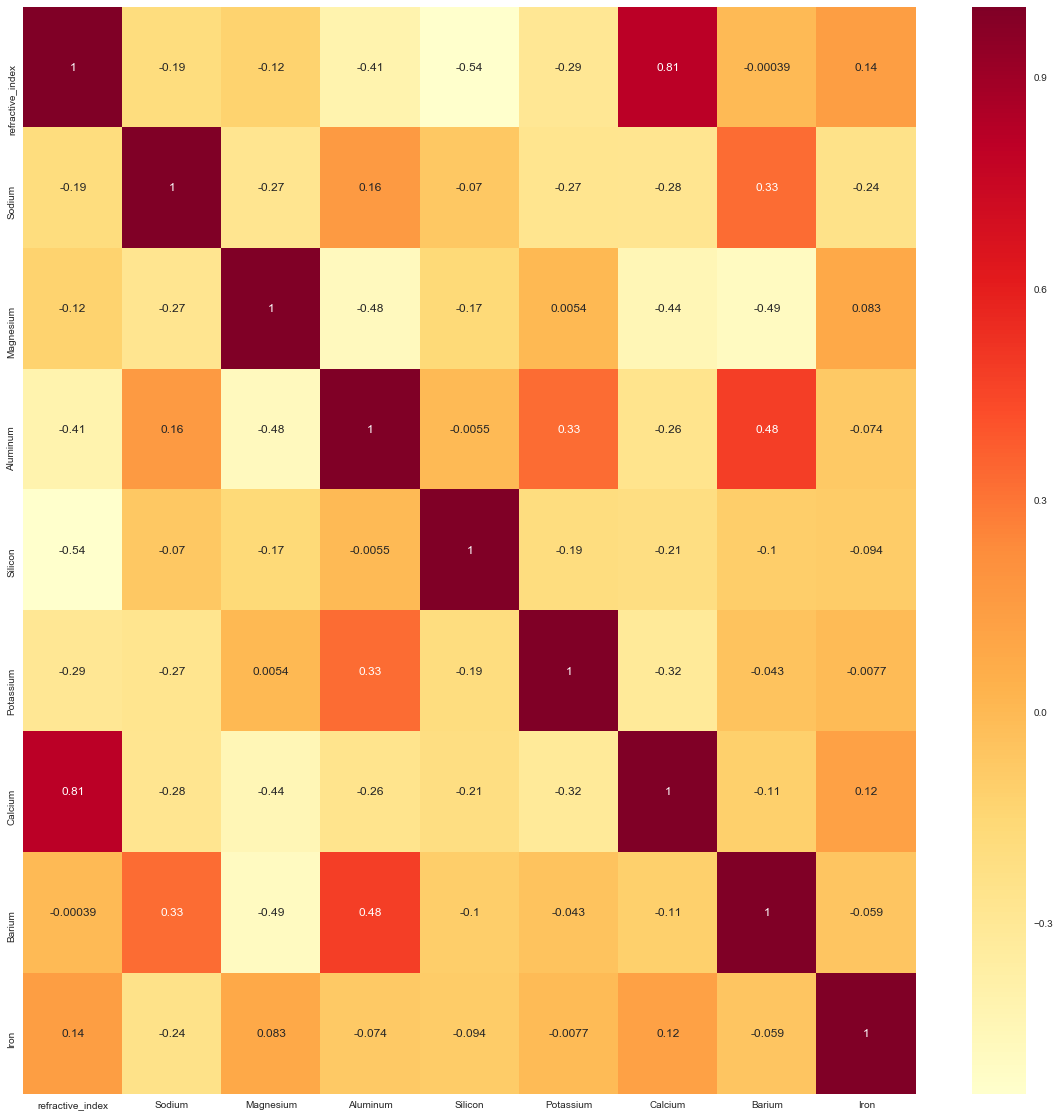

In [131]:
plt.figure(figsize=(20,20))
sns.heatmap(glass.iloc[:,0:9].corr(), cmap ='YlOrRd', annot = True)

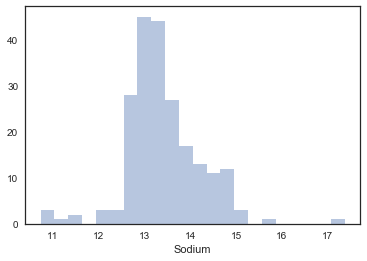

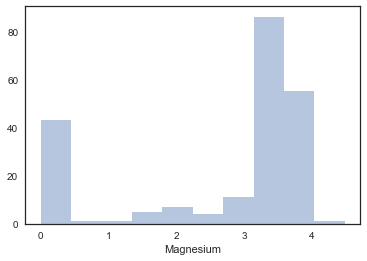

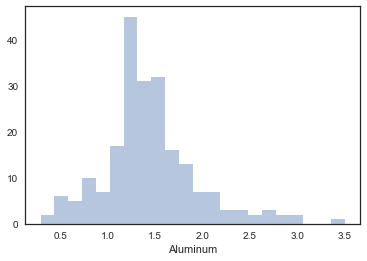

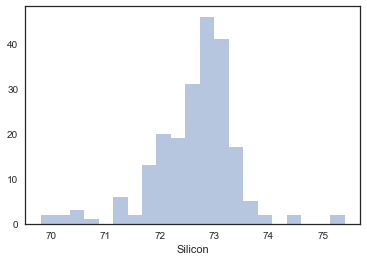

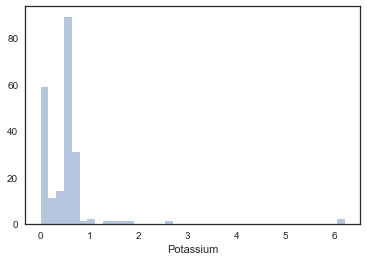

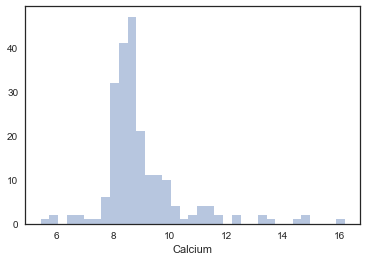

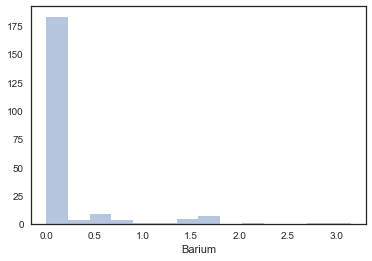

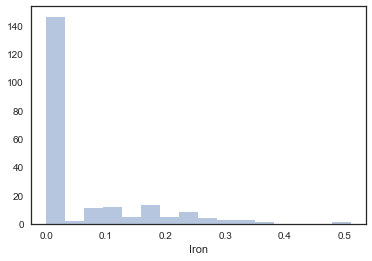

In [118]:
elements = glass.columns[1:-1].tolist()
for e in elements:
    sns.distplot(glass[e], kde = False)
    plt.show()

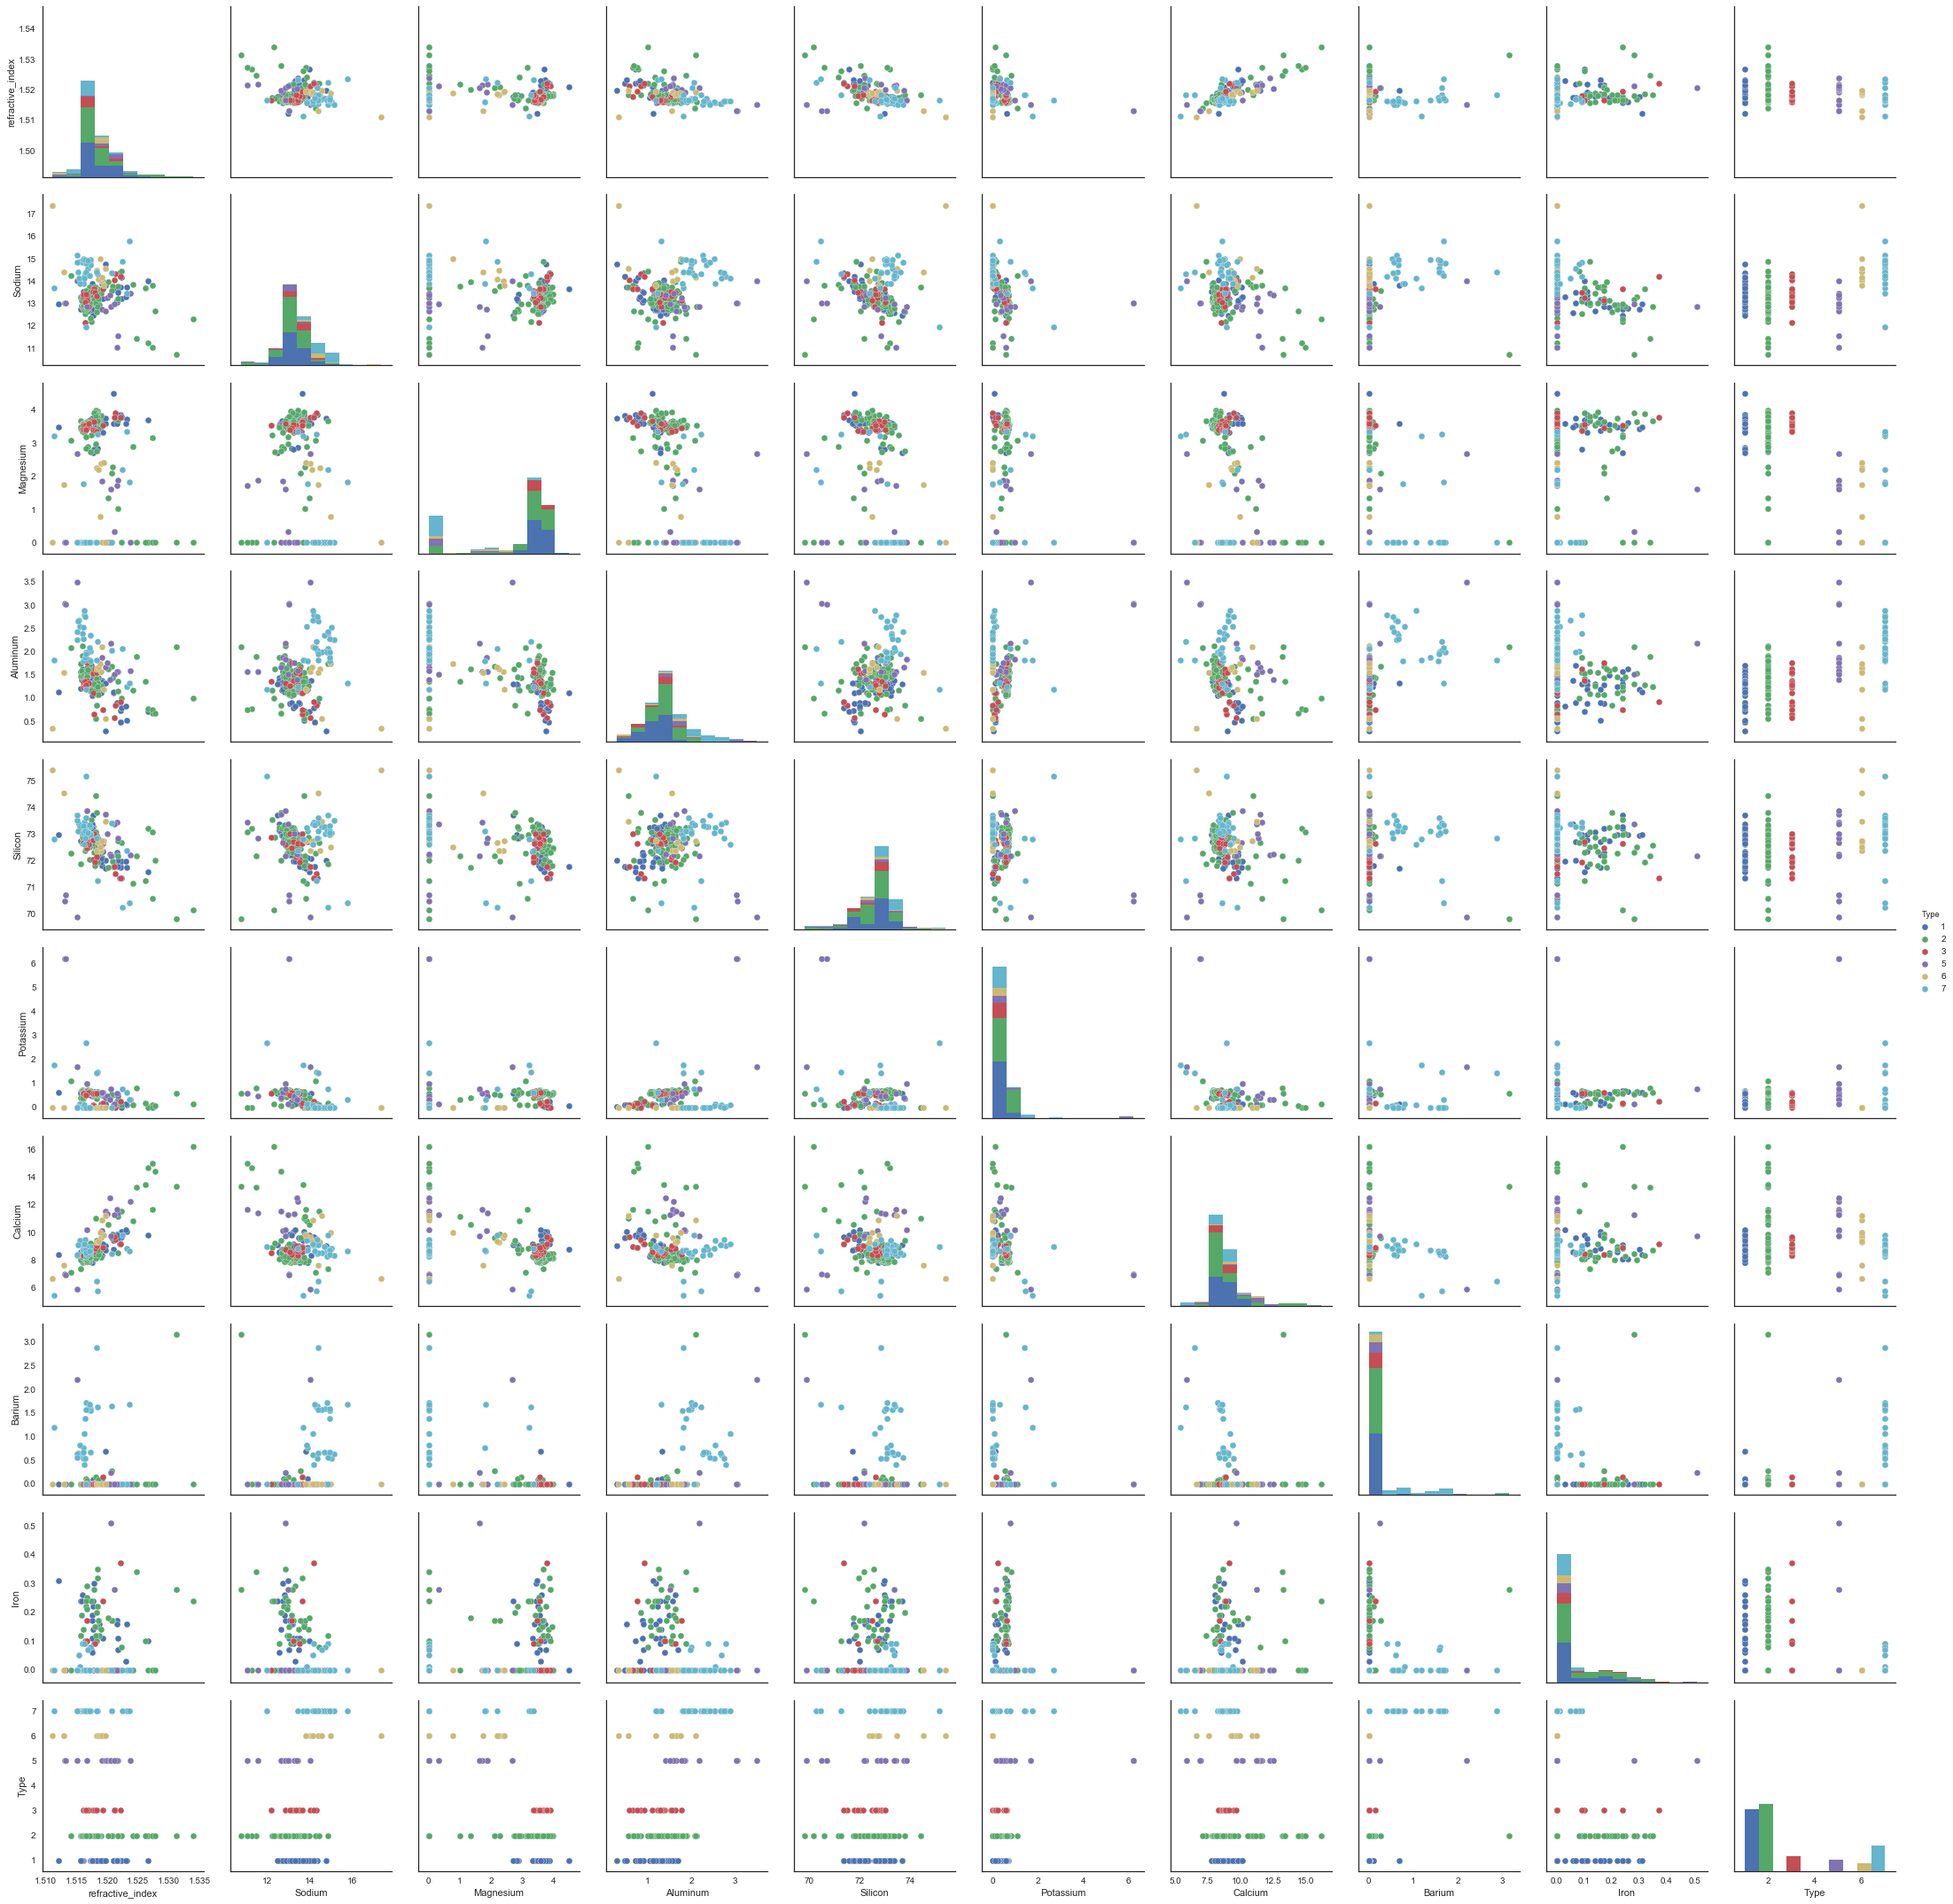

In [106]:
sns.pairplot(glass, hue = "Type", size = 3)
plt.show()

What did you understand about data?

1. The measurements for the different elements (attributes) are not scaled. For example, the elemtn with the highest measurement is silicon with 75.41. while iron's maximum value is 0.51. Similarly, the mean of Silicon is 72.65 while it is 0.057 for Iron. These measurements will have to be normalized before training the model else it will be biased towards the features with higher measurements.

2. None of the features as seen from the histograms has a uniform distribution.

3. Type 1 and Type 2 glass are the most common accounting for about 68% of the glass types. This is not an even distribution. It is skewed/unbalanced.

4. There is a fairly strong positive correlation between Refractive index and Calcium (0.81). The highest negative correlation is observed between Refractive Index and Silicon(-0.54)


# Data Preparation

In [135]:
glass.isnull().sum()

refractive_index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Type                0
dtype: int64

No missing data. Clean!

DATA SPLITTING AND TRANSFORMATION

In [210]:
X = glass.iloc[:,0:9]
y = glass['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [211]:
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(149, 9) (65, 9) (149,) (65,)


In [212]:
stdsc = StandardScaler()
stdsc.fit(X_train)
X_train_std = stdsc.transform(X_train)
X_test_std = stdsc.transform(X_test)

In [450]:
knn = KNeighborsClassifier(n_neighbors= 1, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [451]:
y_pred = knn.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Accuracy: 0.75
Misclassified samples: 16


# Parameter tuning with cross validation

In [271]:
from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
k_list= list(range(1,50))

# subsetting just the odd ones
# neighbors = filter(lambda x: x % 2 != 0, k_list)
neighbors = list(range(1,50,2))
# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 1


AttributeError: module 'matplotlib.pyplot' has no attribute 'ylabel'

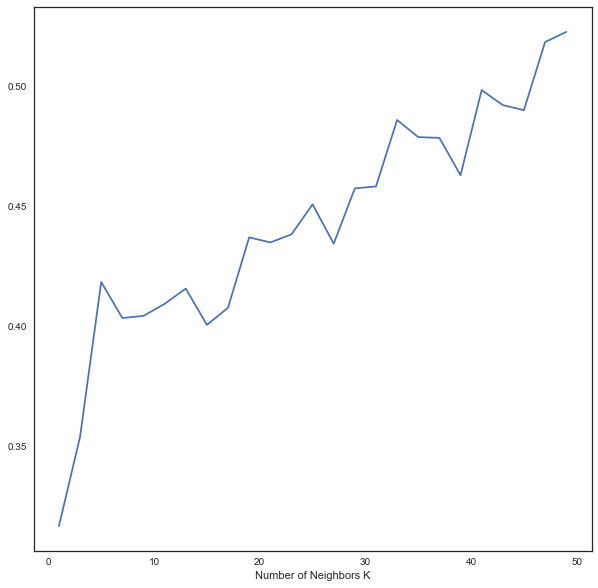

In [272]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.figure(figsize = (10,10))
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [276]:
min(MSE)

0.3170308123249299

# What would be the best value of K to choose??? Why?

The best value of K in this context is 1. this is because it is only at k = 1 neighbours that we observe the highest classifier accuracy(or conversely, the lowest misclassification error). The plot above shows a general trend where misclassification error tends to rise with increasing values of K.

# Weighed Voting

This can be done by changing the default value of the 'weights' parameter in KNeighborsClassifier from 'uniform' to 'distance'.

In [327]:
cv_scores_wv = []
for k in neighbors:
    knn_wv = KNeighborsClassifier(n_neighbors=k, weights = 'distance')
    scores_wv = cross_val_score(knn_wv, X_train_std, y_train, cv=10, scoring='accuracy')
    cv_scores_wv.append(scores_wv.mean())

In [328]:
MSE_wv = [1 - x for x in cv_scores_wv]
optimal_k_wv = neighbors[MSE_wv.index(min(MSE_wv))]
print ("The optimal number of neighbors is %d" % optimal_k_wv)

The optimal number of neighbors is 3


In [275]:
(min(MSE_wv))

0.3170308123249299

# Distance Metric

In [324]:
cv_scores_mhtn = []
for k in neighbors:
    knn_mhtn = KNeighborsClassifier(n_neighbors=k, weights = 'distance', metric= 'manhattan')
    scores_mhtn = cross_val_score(knn_mhtn, X_train_std, y_train, cv=10, scoring='accuracy')
    cv_scores_mhtn.append(scores_mhtn.mean());
    
MSE_mhtn = [1 - x for x in cv_scores_mhtn]
optimal_k_mhtn = neighbors[MSE_mhtn.index(min(MSE_mhtn))]
print ("The optimal number of neighbors is %d" % optimal_k_mhtn)

The optimal number of neighbors is 5


In [326]:
min(MSE_mhtn)

0.27236694677871154

In [283]:
# cv_scores_euc = []
# for k in neighbors:
#     knn_euc = KNeighborsClassifier(n_neighbors=k, weights = 'distance', metric= 'euclidian')
#     scores_euc = cross_val_score(knn_euc, X_train, y_train, cv=10, scoring='accuracy')
#     cv_scores_euc.append(scores_euc.mean());
    
# MSE_euc = [1 - x for x in cv_scores_euc]
# optimal_k_euc = neighbors[MSE_euc.index(min(MSE_euc))]
# print ("The optimal number of neighbors is %d" % optimal_k_euc)

# Normalization

In [284]:
from sklearn.preprocessing import normalize

In [286]:
# norm.fit(X_train)
X_train_normalized = normalize(X_train)
X_test_normalized = normalize(X_test)

In [319]:
knnclassifier = KNeighborsClassifier(n_neighbors = 3, p=2, metric='minkowski')
knnclassifier.fit(X_train_normalized, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [320]:
y_pred_normalized = knnclassifier.predict(X_test_normalized)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_normalized))
print('Misclassified samples: %d' % (y_test != y_pred_normalized).sum())

Accuracy: 0.77
Misclassified samples: 15


In [323]:
cv_scores_norm = []
for k in neighbors:
    knnclassifier = KNeighborsClassifier(n_neighbors = k, p=2, metric='minkowski')
    scores_norm = cross_val_score(knnclassifier, X_train_normalized, y_train, cv=10, scoring='accuracy')
    cv_scores_norm.append(scores_norm.mean());
    
MSE_norm = [1 - x for x in cv_scores_norm]
optimal_k_norm = neighbors[MSE_norm.index(min(MSE_norm))]
print ("The optimal number of neighbors is %d" % optimal_k_norm)

The optimal number of neighbors is 3


In [329]:
min(MSE_norm)

0.3266421568627451

# Combining weighed voting with manhattan metric

In [330]:
cv_scores_norm_t = []
for k in neighbors:
    knnclassifier_t = KNeighborsClassifier(n_neighbors = k, weights = 'distance', p=2, metric='manhattan')
    scores_norm_t = cross_val_score(knnclassifier_t, X_train_normalized, y_train, cv=10, scoring='accuracy')
    cv_scores_norm_t.append(scores_norm_t.mean());
    
MSE_norm_t = [1 - x for x in cv_scores_norm]
optimal_k_norm_t = neighbors[MSE_norm_t.index(min(MSE_norm_t))]
print ("The optimal number of neighbors is %d" % optimal_k_norm_t)
min(MSE_norm_t)

The optimal number of neighbors is 3


0.3266421568627451

# Dimensionality reduction using PCA

In [331]:
 from sklearn.decomposition import PCA

In [352]:
pca = PCA(0.9)
pca.fit(X_train_std)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [353]:
pca.n_components_

6

In [355]:
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [444]:
knn_pca = KNeighborsClassifier(n_neighbors = 27, weights='distance', metric= 'manhattan')
knn_pca.fit(X_train_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=27, p=2,
           weights='distance')

In [445]:
y_pred_pca = knn_pca.predict(X_test_pca)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_pca))
print('Misclassified samples: %d' % (y_test != y_pred_pca).sum())

Accuracy: 0.80
Misclassified samples: 13


# Confusion matrix

In [446]:
from sklearn.metrics import confusion_matrix

In [449]:
cnf_matrix = confusion_matrix(y_test, y_pred_pca)
cnf_matrix

array([[22,  2,  0,  0,  0,  0],
       [ 3, 21,  0,  0,  1,  0],
       [ 2,  1,  0,  0,  0,  0],
       [ 1,  1,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  8]], dtype=int64)

# Conclusion

After tuning and diagonising as above, I was able to get the model to an accurcay level of 80%, with K = 27.
However, this was due to a combination of PCA (retaining 90% Variance allowed for 6 components), using the weights = 'distance' parameter which weighed points by the inverse of their distance and finally using the 'manhattan' distance metric.